**кластеризатор ФОРЭЛ**


Евгений Борисов borisov.e@solarl.ru

---

In [1]:
# import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

---

In [2]:
# X = np.vstack([ 
#       np.loadtxt('../data/800_2b/points_1.txt'), 
#       np.loadtxt('../data/800_2b/points_2.txt') 
#     ])

In [3]:
X = np.loadtxt('../data/360_1/points_1.txt')

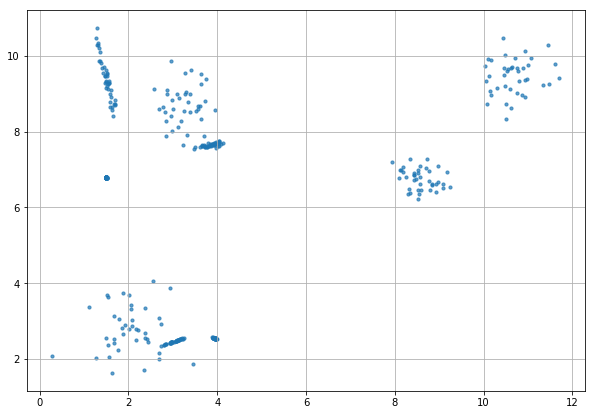

In [4]:
plt.figure(figsize=(10,7))
plt.scatter( x=X[:,0], y=X[:,1], s=10, alpha=0.7 )
plt.grid()
plt.show()

---

In [5]:
#euclidean_distances(X).max()/10

In [6]:
max_rad = euclidean_distances(X).max()/10.0 # размер кластера

delta = 1e-32
max_iter = 1000
clst = []

In [7]:
U = np.random.permutation(X.shape[0]) # список номеров необработаных точек

In [8]:
for i in range(max_iter):

    # выбираем случайную точку из не обработанных
    xc = X[U[0],:].reshape(1,X.shape[1]) 
    
    K = U
    for j in range(max_iter):
        R = euclidean_distances(xc,X[K,:]).flatten() # расстояния от точки xc до всех точек кластера K
        
        ki = np.argsort(R) # индексы в кластере K отсортированных по расстоянию до xc точек кластера K
        K = K[ ki[ R[ki]<max_rad ] ] # номера точек в радиусе max_rad от xc
        xc_old = xc
        xc = X[K,:].mean(axis=0).reshape(1,X.shape[1])  # пересчитываем центроид
        # если центроид не сдвинулся то завершаем цикл
        if np.square(xc_old-xc).sum() < delta: break

    clst.append(K)
    
    U = list(set(U)-set(K))
    if len(U) < 1: break
    
    print(len(U))
    
    U = np.random.permutation( U )
    
    

327
254
214
122
113
78
38
26
21
14
7
2


In [9]:
len(clst)

13

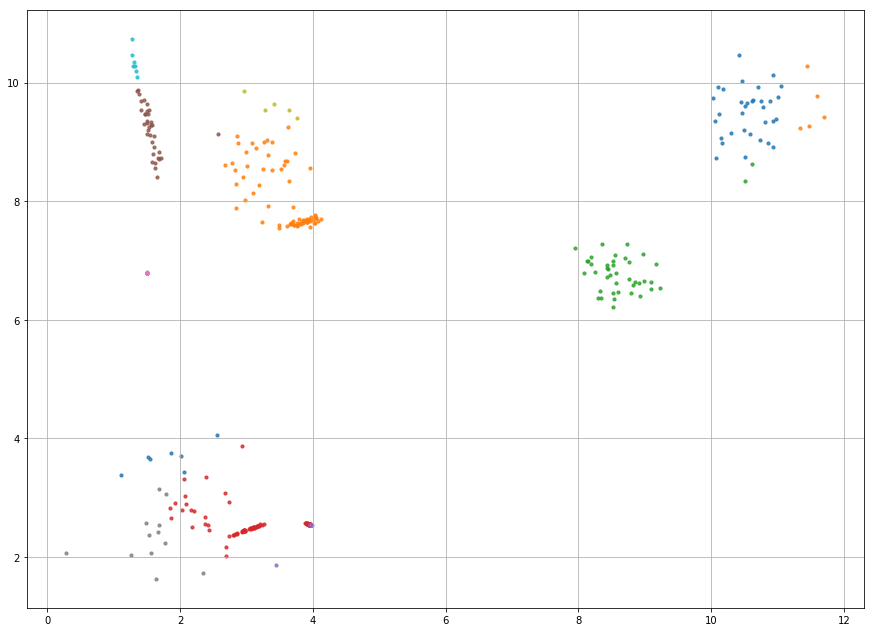

In [11]:
plt.figure(figsize=(15,11))
for c in clst: plt.scatter( x=X[c,0], y=X[c,1], s=10, alpha=0.8 )
plt.grid()
plt.show()